In [19]:
import numpy as np


In [20]:

def gauss2(a,b):
    b_n=bmat.shape[1]
    x=np.zeros(bmat.shape)
    # elimination phase (상삼각행렬 만들기)
    for k in range(0, n - 1):  # pivot rows 1~n-1까지
        for i in range(k + 1, n):
            if a[i, k] != 0:
                #print('we are in the loop', i, k)
                lam = a[i, k] / a[k, k]  # defintion of lambda
                # a[i,k]=0
                a[i, k:n] = a[i, k:n] - lam * a[k, k:n]
                b[i,:] = b[i,:] - lam * b[k,:]

    # Back substitiution

    for k in range(n - 1, -1, -1):
        for m in range(b_n):
          print(k,m)
          x[k,m] = (b[k,m] - np.dot(a[k, k + 1:n], x[k + 1:n])) / a[k, k]
    return x

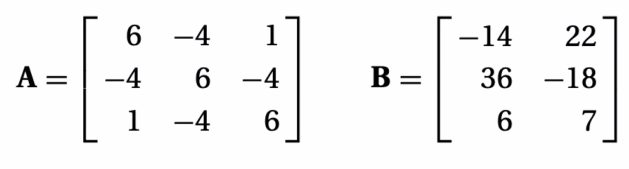

In [33]:
A= np.array([[6, -4, 1],
            [-4, 6, -4],
            [1, -4,  6]],dtype=float)

B= np.array([[-14, 22],
             [ 36,-18],
             [  6,  7]],dtype=float)

In [22]:
# row2 -> row2-(-2/3)*row1
lam = A[1,0]/A[0,0]
#A[1,0]=A[1,0]-A[0,0]*lam

A[1,:]=A[1,:]-lam*A[0,:]
print(A)

#row3 ->row3 -lam2*row1
lam2= A[2,0]/A[0,0]
A[2,:]=A[2,:]-lam2*A[0,:]
print(A)

#row3 -> row3-lam3*row2
lam3=A[2,1]/A[1,1]
A[2,:]=A[2,:]-lam3*A[1,:]
print(A)

[[ 6.         -4.          1.        ]
 [ 0.          3.33333333 -3.33333333]
 [ 1.         -4.          6.        ]]
[[ 6.         -4.          1.        ]
 [ 0.          3.33333333 -3.33333333]
 [ 0.         -3.33333333  5.83333333]]
[[ 6.         -4.          1.        ]
 [ 0.          3.33333333 -3.33333333]
 [ 0.          0.          2.5       ]]


In [34]:
A_B=np.concatenate([A,B],axis=1)
# row2 -> row2-(-2/3)*row1
lam = A_B[1,0]/A_B[0,0]
#A[1,0]=A[1,0]-A[0,0]*lam

A_B[1,:]=A_B[1,:]-lam*A_B[0,:]
print(A_B)

#row3 ->row3 -lam2*row1
lam2= A_B[2,0]/A_B[0,0]
A_B[2,:]=A_B[2,:]-lam2*A_B[0,:]
print(A_B)

#row3 -> row3-lam3*row2f
lam3=A_B[2,1]/A_B[1,1]
A_B[2,:]=A_B[2,:]-lam3*A_B[1,:]
print(A_B)

[[  6.          -4.           1.         -14.          22.        ]
 [  0.           3.33333333  -3.33333333  26.66666667  -3.33333333]
 [  1.          -4.           6.           6.           7.        ]]
[[  6.          -4.           1.         -14.          22.        ]
 [  0.           3.33333333  -3.33333333  26.66666667  -3.33333333]
 [  0.          -3.33333333   5.83333333   8.33333333   3.33333333]]
[[ 6.00000000e+00 -4.00000000e+00  1.00000000e+00 -1.40000000e+01
   2.20000000e+01]
 [ 0.00000000e+00  3.33333333e+00 -3.33333333e+00  2.66666667e+01
  -3.33333333e+00]
 [ 0.00000000e+00  0.00000000e+00  2.50000000e+00  3.50000000e+01
  -4.44089210e-16]]


In [35]:
after_A=A_B[:,:3]
after_B=A_B[:,3:5]
x=np.zeros([3,2])

In [36]:
#after_A[2,2]*x[2,:]=after_B[2,:]
x[2:]=after_B[2,:]/after_A[2,2]
print(x)

[[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.40000000e+01 -1.77635684e-16]]


In [37]:
#after_A[1,1]*x[1,:]+after_A[1,2]*x[2,:]=after_B[1,:]
x[1,:]=(after_B[1,:]-after_A[1,2]*x[2,:])/after_A[1,1]
print(x)

[[ 0.00000000e+00  0.00000000e+00]
 [ 2.20000000e+01 -1.00000000e+00]
 [ 1.40000000e+01 -1.77635684e-16]]


In [38]:
#after[0,0]*x[0:]+after_A[0,1]*x[1,:]+after_A[0,2]*x[2,:]=after_B[0,:]
x[0,:]=(after_B[0,:]-after_A[0,2]*x[2,:]-after_A[0,1]*x[1,:])/after_A[0,0]
print(np.round_(x,3))

[[10.  3.]
 [22. -1.]
 [14. -0.]]


In [28]:
A_2=A.copy()
A_2[[0,2]]=A[[2,0]] #row swap

In [29]:
A_2

array([[ 0.        ,  0.        ,  2.5       ],
       [ 0.        ,  3.33333333, -3.33333333],
       [ 6.        , -4.        ,  1.        ]])

In [30]:
A_2[:,[0,2]]=A_2[:,[2,0]] #col swap

In [31]:
A_2 

array([[ 2.5       ,  0.        ,  0.        ],
       [-3.33333333,  3.33333333,  0.        ],
       [ 1.        , -4.        ,  6.        ]])

In [32]:
# A = LU
# A@x = b
# L@u@x = b

# L@y = b #전진대입
# y = U@x #후진대입법법

SyntaxError: ignored